## Naive Bayes
### Agenda
1. Introduction Bayes' Theorm
2. Naive Bayes Classifier
3. Gaussian Naive Bayes
4. Multinomial Naive Bayes
5. Burnolis' Naive Bayes
6. Naive Bayes for out-of-core 

### Introduction to Naive Bayes
* The Naive Bayes Classifier technique is based on the Bayesian theorem and is particularly suited when then high dimensional data. 
* It's simple & out-performs many sophisticated methods
* Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|h) and so on.
* The above assumption is very strong & not true for in real situations, still naive bayes works quite well

#### Class Probabilities
* For Bi-class classification, P(Class 1) = Count(Class 1) / Count( Class 1 + Class 2)

#### Conditional Probabilities
* Frequency of each attribute value for each class
* Consider a dataset with attribute - weather ( values - sunny & rainy ). Target - Sports ( values - chess & tennis )
* P(weather=sunny|target=tennis) = Count ( weather=sunny & target=tennis ) / Count ( target=tennis )

### Naive Bayes' Classifier
* Formula : Prediction = Max(P(feature|h).P(h))
* Let's predict for a new data (weather=sunny)
* Possibility of tennis = P(weather=sunny|target=tennis) . P(target=tennis)
* Possibility of chess = P(weather=sunny|target=chess) . P(target=chess)
* We choose the possibility with higher values
* Normalize the value to bring it to scale of 0 to 1

#### More features
* In case, we add more feature like skill (values - low,moderate,high)
* Our probability becomes, P(weather=sunny|target=tennis).P(skill=moderate|target=tennis).P(target=tennis)

### Gaussian Naive Bayes
* The above fundamental example is for categorical data
* We can use Naive Bayes for continues data as well
* Assumption is data should be of Gaussian Distribution
* Let's understand a bit about Gaussian PDF

<img src="https://github.com/awantik/machine-learning-slides/blob/master/gpdf.PNG?raw=true" width="200px">

* Possibility of tennis = P(pdf(precipitation)|class=tennis) . P(pdf(windy)|class=tennis) . P(class=tennis
* Prior probability can be configured. By default, each class is assigned equal probability

In [103]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
iris = load_iris()

In [105]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
gnb = GaussianNB()

In [108]:
gnb.fit(df,iris.target)

GaussianNB(priors=None)

In [109]:
gnb.score(df,iris.target)

0.96

### Multinomial Naive Bayes
* Suited for classification of data with discrete features ( count data )
* Very useful in text processing
* Each text will be converted to vector of word count
* Cannot deal with negative numbers

In [319]:
review_data = pd.read_csv('Reviews.csv')

In [320]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [321]:
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [199]:
review_data = review_data[['Text','Score']]

In [200]:
review_data = review_data[review_data.Score != 3]

In [201]:
review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)

In [202]:
review_data.drop('Score',axis=1,inplace=True)

In [203]:
review_data.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [204]:
review_data.Sentiment.value_counts()

1    443777
0     82037
Name: Sentiment, dtype: int64

In [205]:
review_data = review_data.sample(10000)

#### Remove punchuations

In [206]:
from nltk.tokenize import RegexpTokenizer

In [207]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [208]:
review_data['Text'] = review_data.Text.map(lambda x:tokenizer.tokenize(x))

In [209]:
review_data.Text

443278    [I, have, tried, many, tahini, types, Not, a, ...
566427    [To, be, fair, I, m, not, a, fan, of, boxed, M...
31468     [So, it, s, Chai, If, you, don, t, know, Chai,...
11772     [I, love, these, chopped, walnuts, I, put, the...
514100    [One, of, the, kitties, has, a, very, sensitiv...
173711    [These, are, one, of, the, best, dog, treats, ...
130529    [chips, cousin, teddy, eats, canidae, dog, foo...
385763    [I, do, love, these, products, but, why, so, e...
380255    [FIRST, Let, me, tell, you, that, I, am, the, ...
141634    [I, am, waiting, for, my, box, as, I, type, th...
40785     [This, is, my, favorite, tea, flavor, it, s, h...
330596    [Caribou, Blend, is, my, favorite, of, all, th...
297516    [What, else, can, I, say, They, are, great, he...
88718     [I, bought, dried, milks, Peaks, dry, Whole, M...
73577     [We, converted, to, Rice, Dream, over, a, year...
499867    [My, cat, is, picky, He, also, gets, an, upset...
493453    [Cadbury, eggs, are, one, of, 

#### Stemming

In [210]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [212]:
review_data['Text'] = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])

In [214]:
review_data.Text = review_data.Text.str.join(sep=' ')

#### Preprocessing

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

In [216]:
cv = CountVectorizer(stop_words='english')

In [217]:
review_data_tf = cv.fit_transform(review_data.Text)

#### Splitting data into train_test

In [219]:
trainX,testX,trainY,testY = train_test_split(review_data_tf,review_data.Sentiment)

#### Create Model

In [221]:
review_data.Sentiment.value_counts()

1    8463
0    1537
Name: Sentiment, dtype: int64

* Class Imbalanced
* Two ways to handle this - dealing with data, dealing with algo

In [222]:
from sklearn.naive_bayes import MultinomialNB

In [282]:
mnb = MultinomialNB(class_prior=[.25,.75])

In [283]:
mnb.fit(trainX,trainY)

MultinomialNB(alpha=1.0, class_prior=[0.25, 0.75], fit_prior=True)

In [284]:
mnb.class_prior

[0.25, 0.75]

In [285]:
y_pred = mnb.predict(testX)

In [286]:
from sklearn.metrics import confusion_matrix

In [287]:
confusion_matrix(y_true=testY, y_pred=y_pred)

array([[ 180,  197],
       [  90, 2033]], dtype=int64)

### Bernoulli's Naive Bayes
* Like MultinomialNB, this classifier is suitable for discrete data.
* The difference is that while MultinomialNB works with occurrence counts
* BernoulliNB is designed for binary/boolean features.
* If data is not binary, internally Binarization preprocessing will happen
* Can deal with negative numbers

In [84]:
from sklearn.datasets import make_classification

In [85]:
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)

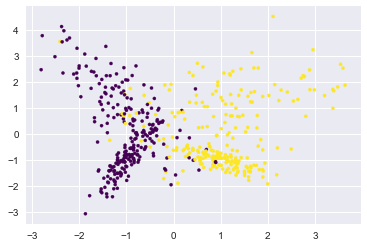

In [86]:
plt.scatter(X[:,0],X[:,1],c=Y,s=10, cmap='viridis')

In [87]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [88]:
trainX,testX,trainY,testY = train_test_split(X,Y)

In [95]:
bnb = BernoulliNB(binarize=0.0)
mnb = MultinomialNB()

In [96]:
bnb.fit(trainX, trainY)
#mnb.fit(trainX, trainY)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [97]:
bnb.score(testX,testY)

0.952

In [98]:
#mnb.score(testX,testY)

In [99]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [100]:
Z = bnb.predict(np.c_[xx.ravel(), yy.ravel()])

In [101]:
Z = Z.reshape(xx.shape)

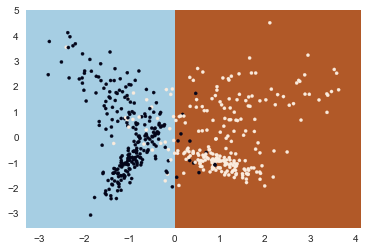

In [102]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

### Out-of-core training
* Naive Bayes supports partial_fit function
* For data which cannot be fit to RAM, we can use partial_fit function to gradually train the model

In [290]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [291]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

* HashingVectorizer is suited for large data, since it doesn't maintain state

In [294]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 18,
                               alternate_sign=False)

In [316]:
review_data_chunks = pd.read_csv('Reviews.csv', chunksize=20000)

In [311]:
test = pd.read_csv('Reviews.csv').sample(10000)

In [313]:
test = test[['Text','Score']]
test = test[test.Score != 3]
test['Sentiment'] = test.Score.map(lambda s:0 if s < 3 else 1)
test.Text = test.Text.map(lambda x:tokenizer.tokenize(x))
test.Text = test.Text.map(lambda l: [stemmer.stem(word) for word in l])
test.Text = test.Text.str.join(sep=' ')
test_tf = vectorizer.transform(test.Text)

In [314]:
mnb = MultinomialNB(class_prior=[.22,.78])

* Taking chunk of data each time & fitting the model & gradually improving it

In [317]:
for idx,review_data in enumerate(review_data_chunks):
    print ('iter : ',idx)
    review_data = review_data[['Text','Score']]
    review_data = review_data[review_data.Score != 3]
    review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)
    review_data.Text = review_data.Text.map(lambda x:tokenizer.tokenize(x))
    review_data.Text = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])
    review_data.Text = review_data.Text.str.join(sep=' ')
    text_tf = vectorizer.transform(review_data.Text)
    mnb.partial_fit(text_tf,review_data.Sentiment,classes=[0,1])
    y_pred = mnb.predict(test_tf)
    print (confusion_matrix(y_pred=y_pred, y_true=test.Sentiment))

iter :  0
[[   3 1434]
 [   1 7781]]
iter :  1
[[   4 1433]
 [   1 7781]]
iter :  2
[[   4 1433]
 [   1 7781]]
iter :  3
[[   5 1432]
 [   1 7781]]
iter :  4
[[   7 1430]
 [   1 7781]]
iter :  5
[[   7 1430]
 [   1 7781]]
iter :  6
[[   8 1429]
 [   1 7781]]
iter :  7
[[   9 1428]
 [   1 7781]]
iter :  8
[[   9 1428]
 [   1 7781]]
iter :  9
[[   9 1428]
 [   1 7781]]
iter :  10
[[   9 1428]
 [   1 7781]]
iter :  11
[[  10 1427]
 [   1 7781]]
iter :  12
[[  11 1426]
 [   1 7781]]
iter :  13
[[  13 1424]
 [   1 7781]]
iter :  14
[[  14 1423]
 [   1 7781]]
iter :  15
[[  15 1422]
 [   1 7781]]
iter :  16
[[  15 1422]
 [   1 7781]]
iter :  17
[[  17 1420]
 [   1 7781]]
iter :  18
[[  17 1420]
 [   1 7781]]
iter :  19
[[  18 1419]
 [   1 7781]]
iter :  20
[[  17 1420]
 [   1 7781]]
iter :  21
[[  18 1419]
 [   1 7781]]
iter :  22
[[  19 1418]
 [   1 7781]]
iter :  23
[[  20 1417]
 [   1 7781]]
iter :  24
[[  20 1417]
 [   1 7781]]
iter :  25
[[  23 1414]
 [   1 7781]]
iter :  26
[[  24 1413

* As we can see, model keeps improving
* Next step would be to use sampling techniques to improve further accuracy